In [1]:
import warnings
warnings.filterwarnings("ignore")
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import neurokit2 as nk
import seaborn as sns

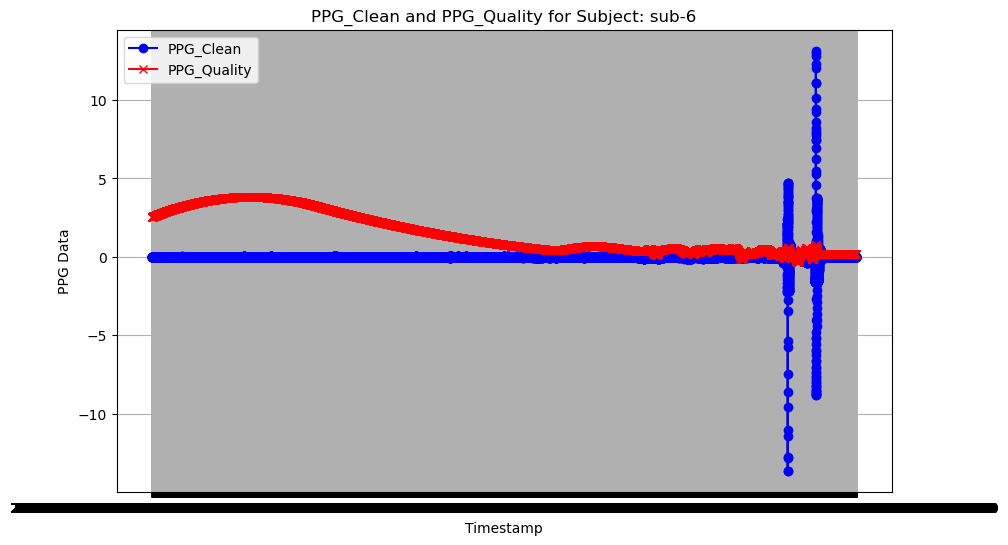

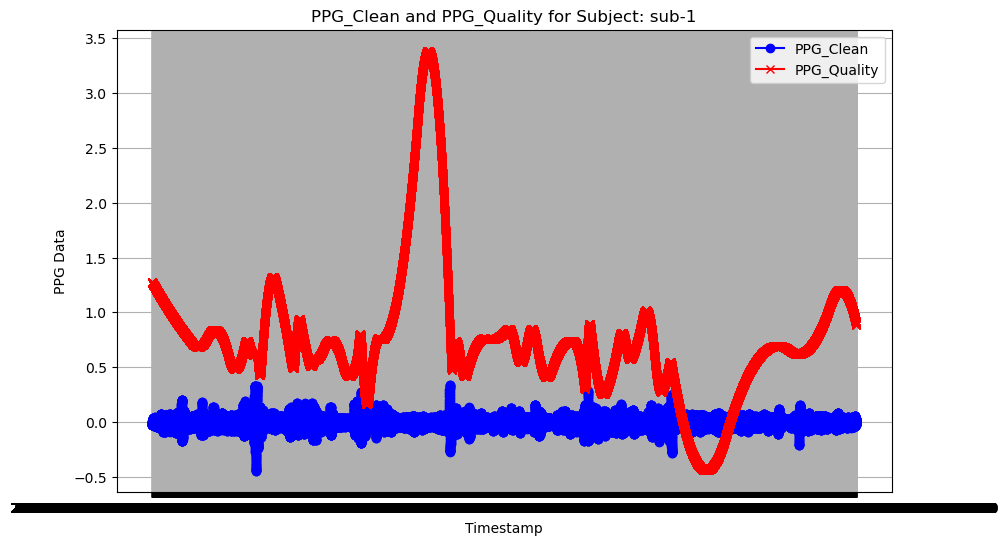

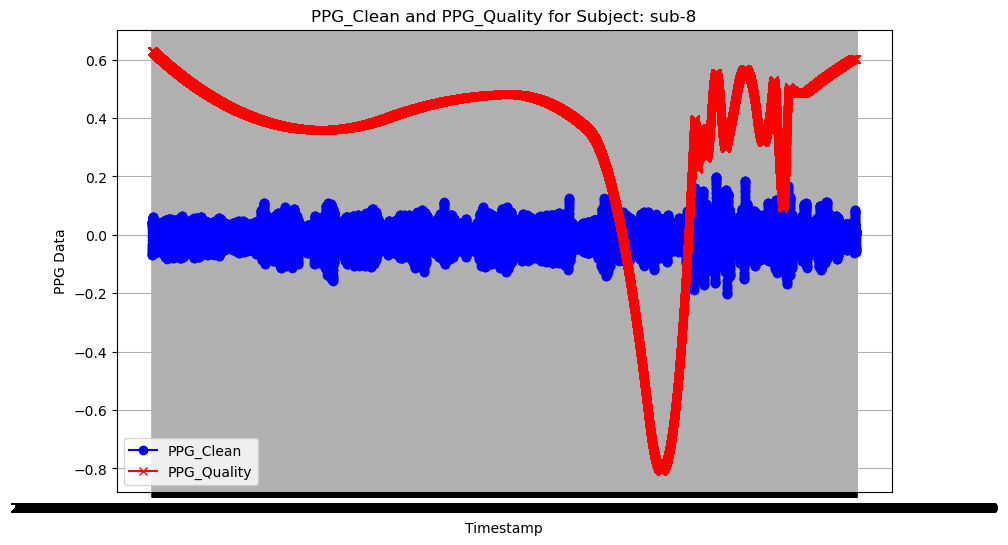

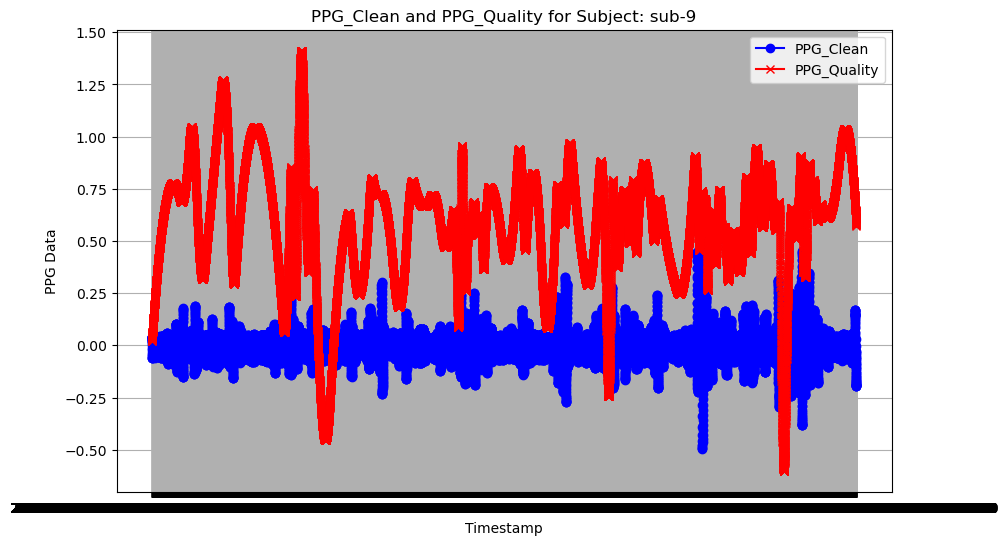

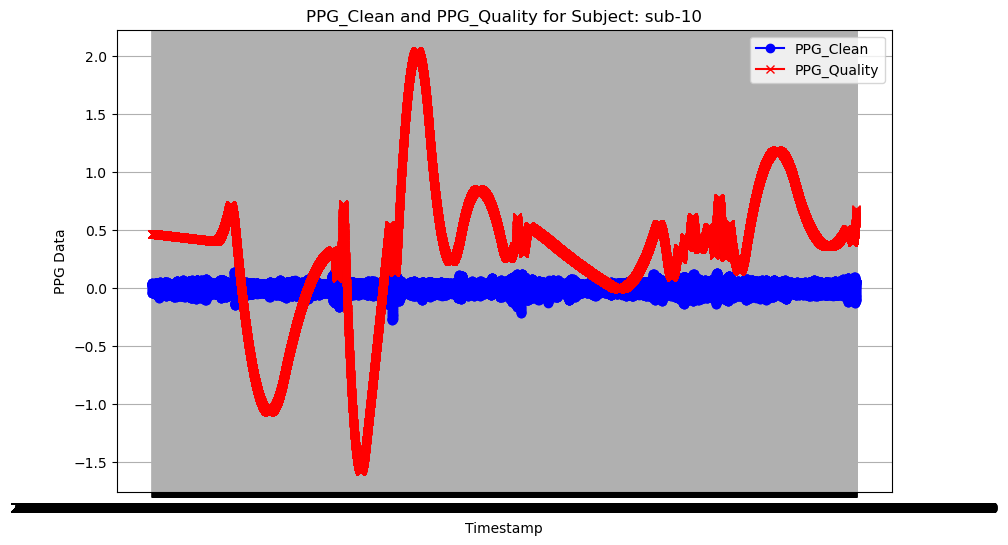

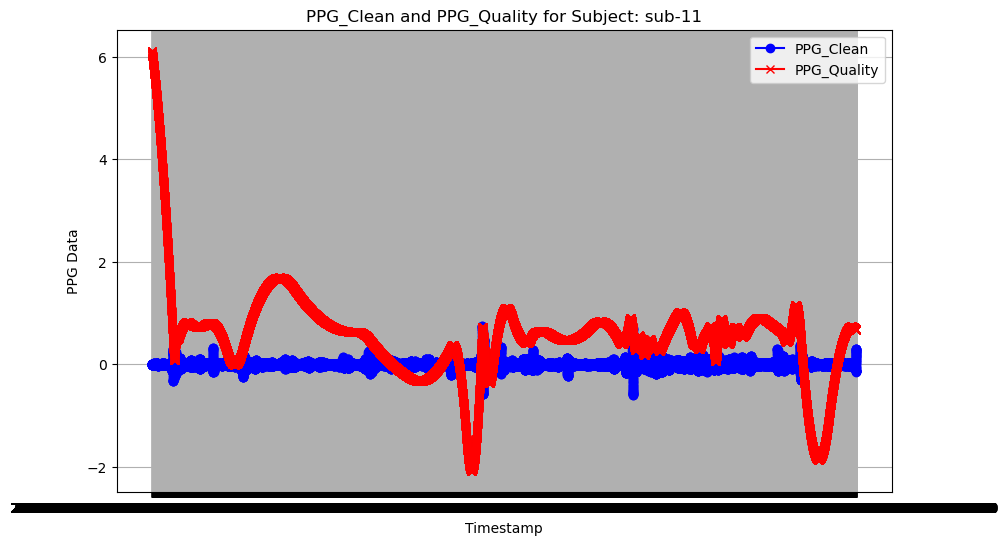

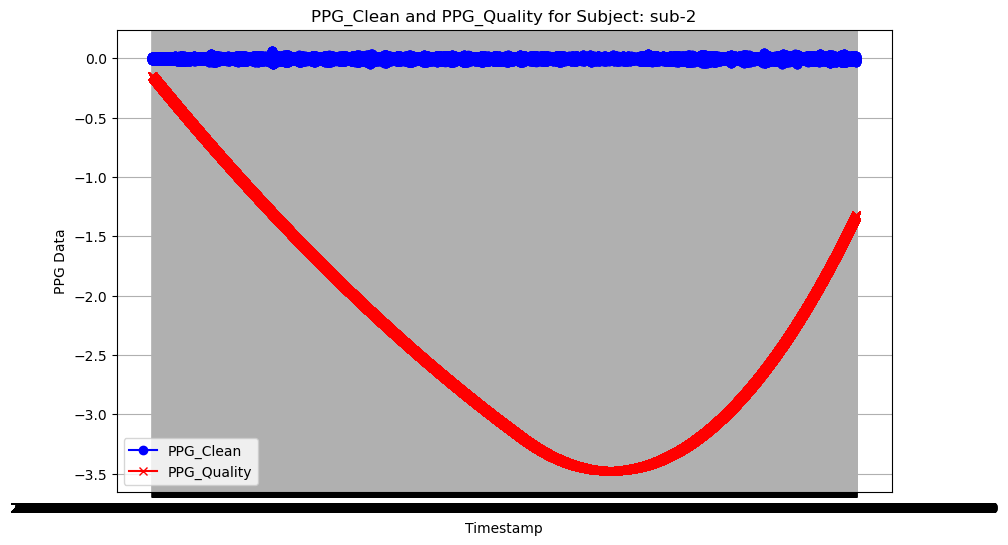

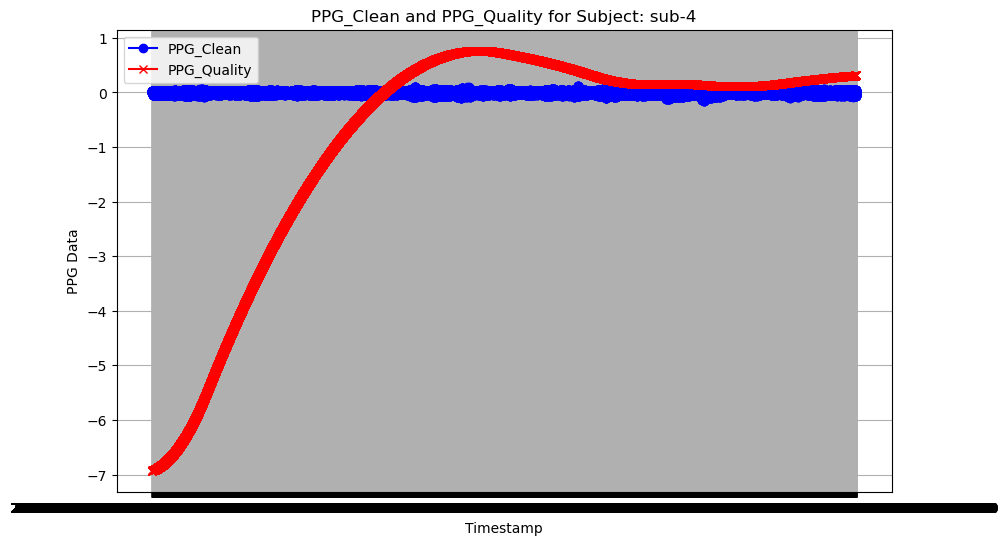

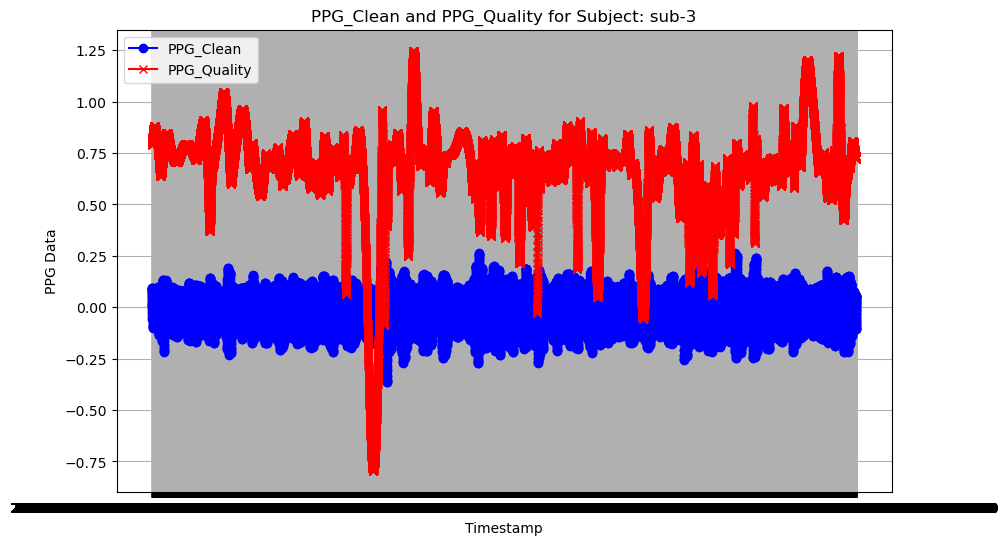

Finished processing all subjects (session-4.csv).


In [15]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Base directory for subject folders
base_dir = '/Users/dhwanishah/Desktop/MS/VR-Dhwani/subject-csvs-hr'

# Loop through subfolders
for sub_folder in os.listdir(base_dir):
    sub_path = os.path.join(base_dir, sub_folder)

    # Check if it's a directory
    if os.path.isdir(sub_path):
        session_file = 'session-4.csv'  # Target session file
        session_path = os.path.join(sub_path, session_file)

        # Check if session-4.csv exists
        if os.path.exists(session_path):
            try:
                # Read the CSV file
                df = pd.read_csv(session_path)

                # Assuming x-axis and y-axis data are in 'Timestamp', 'PPG_Clean', and 'PPG_Quality'
                x_data = df['Timestamp']
                y_data_clean = df['PPG_Clean']
                y_data_quality = df['PPG_Quality']

                # Create the plot (adjust figure size as needed)
                plt.figure(figsize=(10, 6))

                # Plot PPG_Clean data
                plt.plot(x_data, y_data_clean, marker='o', linestyle='-', color='blue', label='PPG_Clean')

                # Plot PPG_Quality data
                plt.plot(x_data, y_data_quality, marker='x', linestyle='-', color='red', label='PPG_Quality')

                # Set labels and title (modify title if needed)
                plt.xlabel('Timestamp')
                plt.ylabel('PPG Data')
                plt.title(f'PPG_Clean and PPG_Quality for Subject: {sub_folder}')

                # Add grid, legend, and show the plot
                plt.grid(True)
                plt.legend()

                # Show the plot (optional)
                plt.show()

                # Optionally, save the plot with the subject name
                # plt.savefig(f'{sub_folder}_PPG_Clean_and_Quality.png', dpi=300, bbox_inches='tight')

                # Close the plot for next iteration
                plt.close()

            except Exception as e:  # Handle potential errors during reading
                print(f"Error processing file {session_path}: {e}")

print("Finished processing all subjects (session-4.csv).")


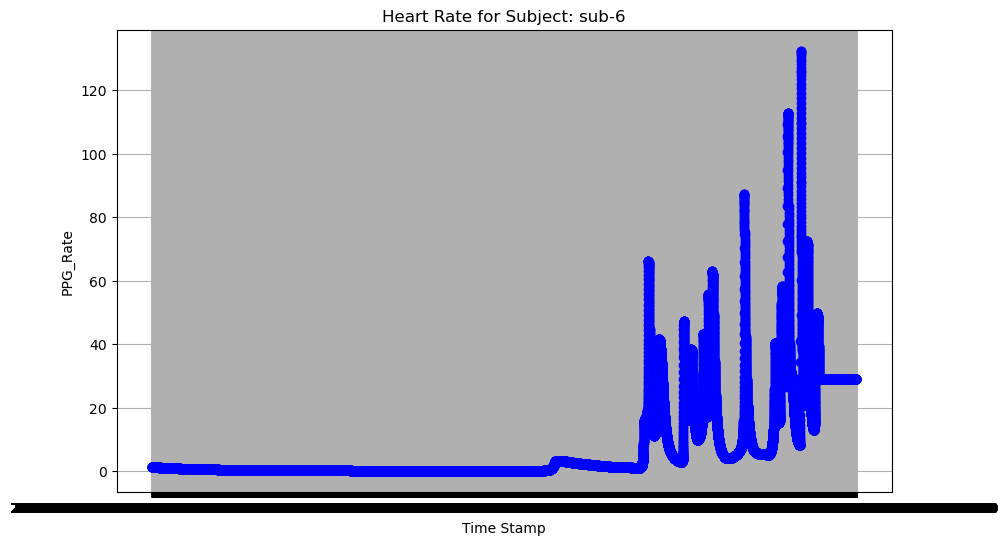

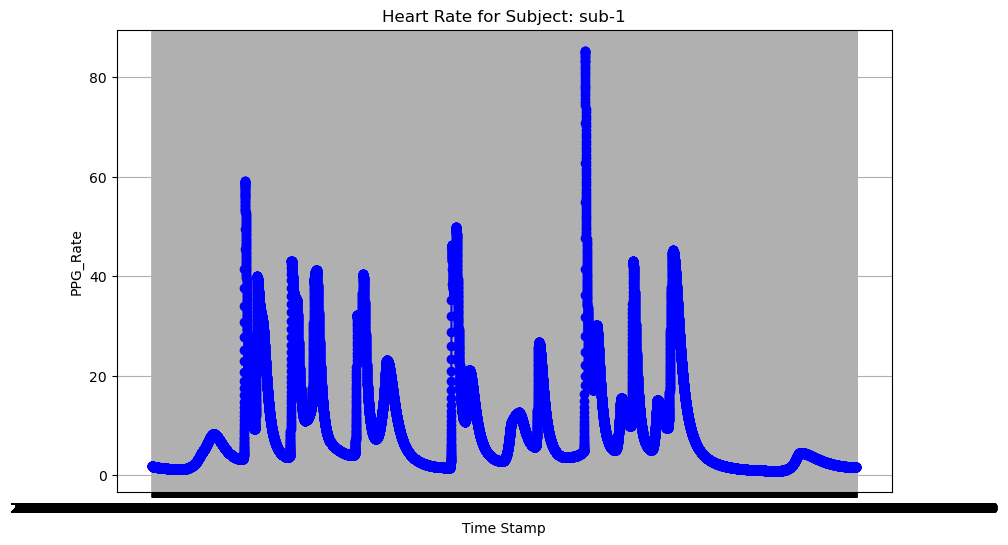

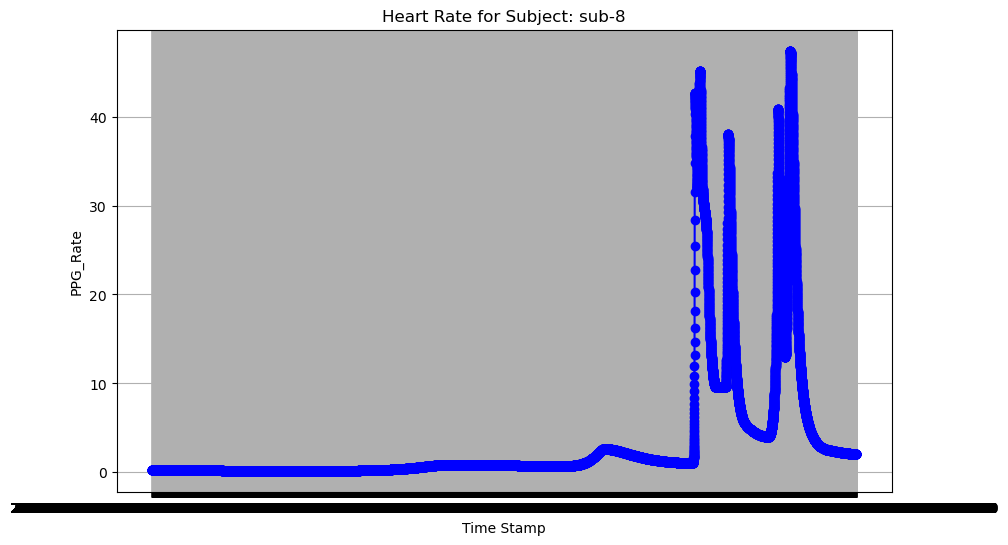

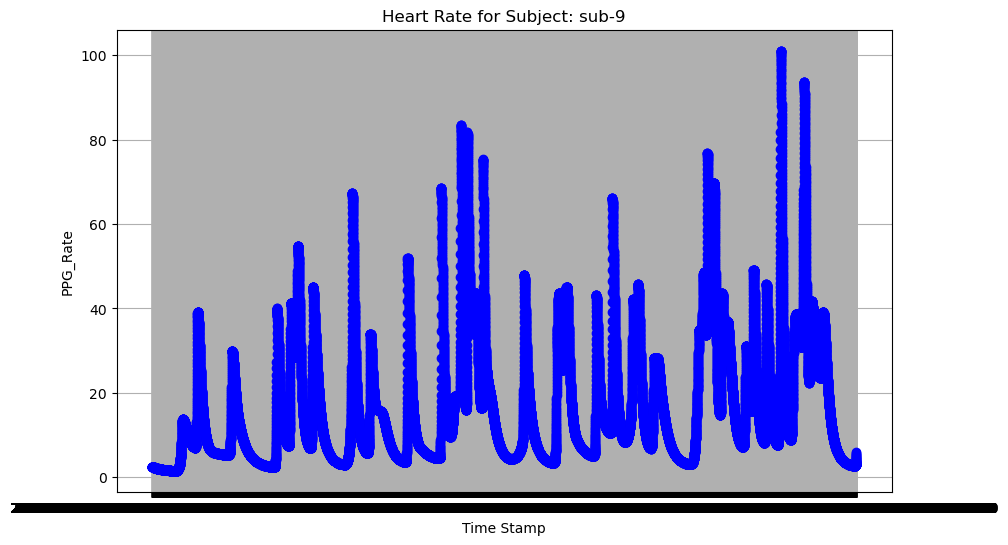

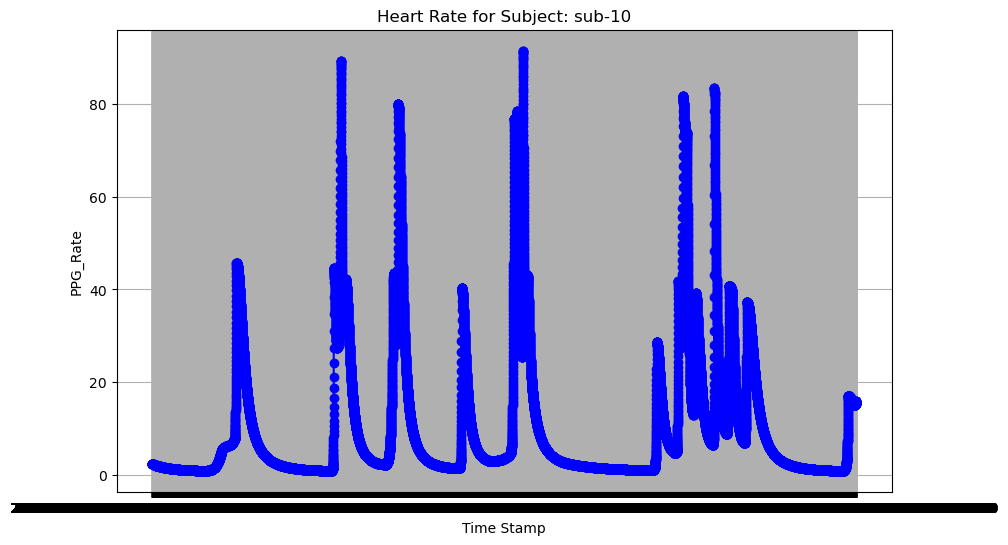

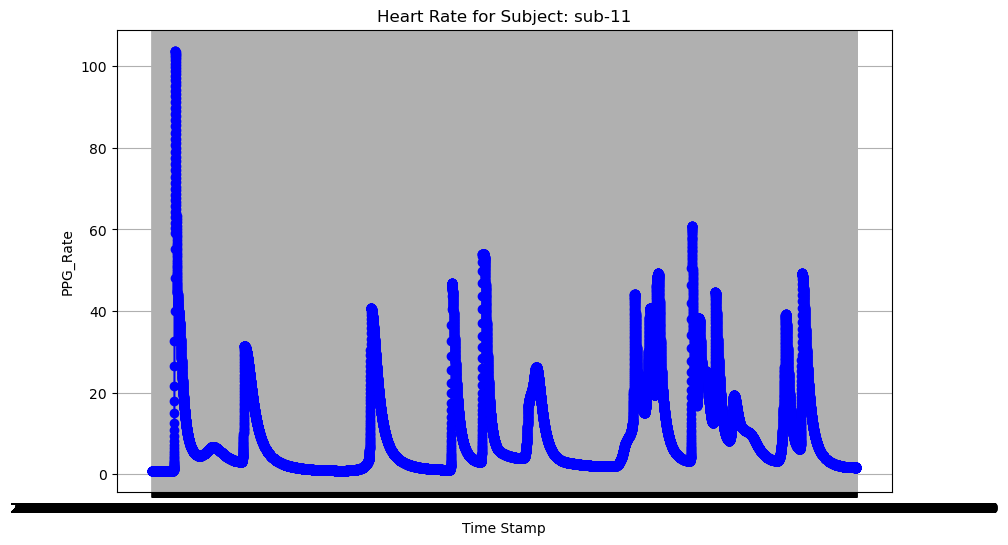

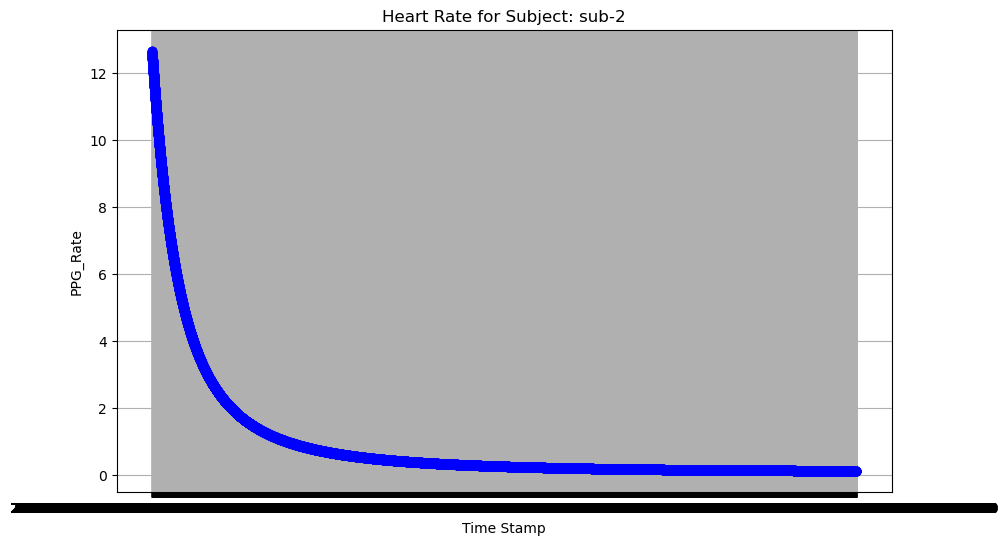

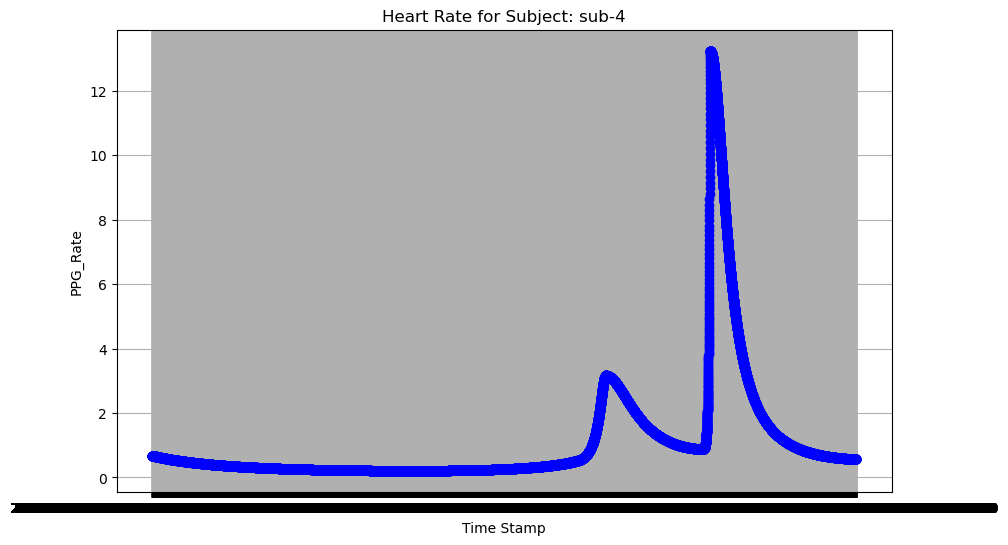

KeyboardInterrupt: 

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Base directory for subject folders
base_dir = '/Users/dhwanishah/Desktop/MS/VR-Dhwani/subject-csvs-hr'

# Loop through subfolders
for sub_folder in sorted(os.listdir(base_dir)):
    sub_path = os.path.join(base_dir, sub_folder)

    # Check if it's a directory
    if os.path.isdir(sub_path):
        session_file = 'session-4.csv'  # Target session file
        session_path = os.path.join(sub_path, session_file)

        # Check if session-1.csv exists
        if os.path.exists(session_path):
            try:
                # Read the CSV file
                df = pd.read_csv(session_path)

                # Assuming x-axis and y-axis data are in 'timestamp' and 'EDA_Tonic'
                x_data = df['Timestamp']
                y_data = df['PPG_Rate']

                # Create the plot (adjust figure size as needed)
                plt.figure(figsize=(10, 6))
                plt.plot(x_data, y_data, marker='o', linestyle='-', color='blue')

                # Set labels and title (modify title if needed)
                plt.xlabel('Time Stamp')
                plt.ylabel('PPG_Rate')
                plt.title(f'Heart Rate for Subject: {sub_folder}')

                # Show the plot (optional)
                plt.grid(True)
                plt.show()

                # Optionally, save the plot with subject name
                # plt.savefig(f'{sub_folder}_Tonic_EDA.png', dpi=300, bbox_inches='tight')

                # Close the plot for next iteration
                plt.close()
            except Exception as e:  # Handle potential errors during reading
                print(f"Error processing file {session_path}: {e}")

print("Finished processing all subjects (session-1.csv).")

/Users/dhwanishah/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/dhwanishah/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/var/folders/0k/9bsh4pdj35g8kpn493zfhbsr0000gn/T/ipykernel_1296/2494176660.py:43: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[co

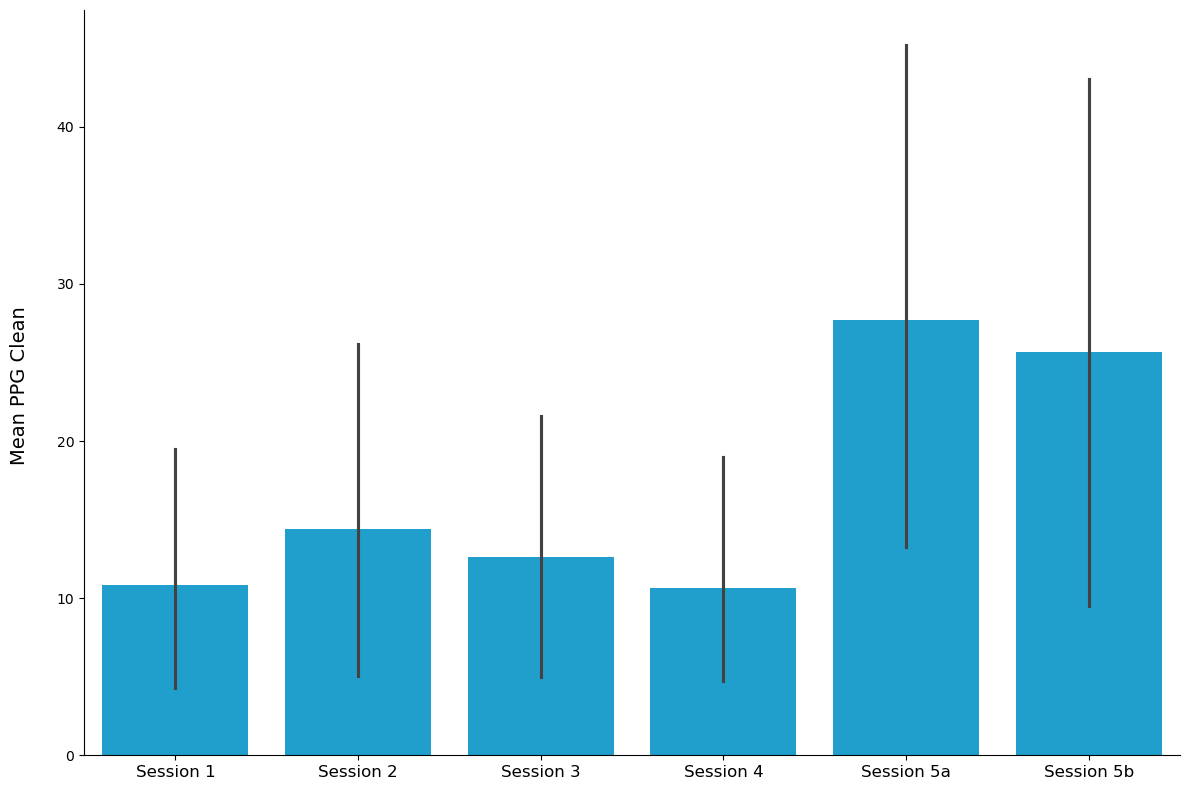

In [1]:


import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

base_dir = '/Users/dhwanishah/Desktop/MS/VR-Dhwani/subject-csvs-hr'
fig_dir = '/Users/dhwanishah/Desktop/MS/VR-Dhwani/figures'


sessions = ['session-1.csv', 'session-2.csv', 'session-3.csv', 'session-4.csv', 'session-5a.csv', 'session-5b.csv']
session_names = ['session1', 'session2', 'session3', 'session4', 'session5a', 'session5b']
session_means = {}

for session_file, session_name in zip(sessions, session_names):
    session_means[session_name] = []

    # Loop through subjects
    for sub_dir in os.listdir(base_dir):
        sub_path = os.path.join(base_dir, sub_dir)
        if os.path.isdir(sub_path):
            session_path = os.path.join(sub_path, session_file)

            if os.path.exists(session_path):
                df_session = pd.read_csv(session_path)
                
                mean_hr = df_session['PPG_Rate'].mean()
                session_means[session_name].append([sub_dir, mean_hr])

    session_means[session_name] = pd.DataFrame(session_means[session_name], columns=['subject', 'mean_hr'])

    # Plot each subject's mean tonic EDA for each session
# Sinai color code: light blue = #05ace8, dark blue = #1e226c, magenta = #c53088

all_sessions = []
for session_name, df in session_means.items():
    df['session'] = session_name  # Add a session column
    all_sessions.append(df)

df_all_sessions = pd.concat(all_sessions, ignore_index=True)

subject_order = [f'sub-{i}' for i in range(1, 11)] 
df_all_sessions['subject'] = pd.Categorical(df_all_sessions['subject'], categories=subject_order, ordered=True)
df_all_sessions['mean_hr'].fillna(df_all_sessions['mean_hr'].mean(), inplace=True)
df_all_sessions = df_all_sessions.sort_values(by=['subject', 'session'])


all_sessions = []
for session_name, df in session_means.items():
    df['session'] = session_name
    all_sessions.append(df)
df_all_sessions = pd.concat(all_sessions, ignore_index=True)

plt.figure(figsize=(12, 8))

# Define labels for the x-axis
labels = ['Session 1', 'Session 2', 'Session 3', 'Session 4', 'Session 5a', 'Session 5b']

sns.barplot(data=df_all_sessions, x='session', y='mean_hr', color = '#05ace8')
plt.xlabel(None)
plt.xticks(ticks=plt.xticks()[0], labels=labels, fontsize=12)
plt.ylabel('Mean PPG Clean \n', fontsize = 14)
plt.tight_layout()
sns.despine()


# if save_figs == 1:
#     plt.savefig(f"{fig_dir}/grouped-participant-session-means.png", dpi=300)
    


In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define base directories
base_dir = '/Users/dhwanishah/Desktop/MS/VR-Dhwani/neurokit-64-hrr'
fig_dir = '/Users/dhwanishah/Desktop/MS/VR-Dhwani/figures'

# Define sessions and their labels
sessions = ['session-1.csv', 'session-2.csv', 'session-3.csv', 'session-4.csv', 'session-5a.csv', 'session-5b.csv']
session_names = ['session1', 'session2', 'session3', 'session4', 'session5a', 'session5b']
session_means = {}

# Loop through each session and calculate means for PPG_Clean, PPG_Rate, and PPG_Quality
for session_file, session_name in zip(sessions, session_names):
    session_means[session_name] = []

    # Loop through subjects
    for sub_dir in os.listdir(base_dir):
        sub_path = os.path.join(base_dir, sub_dir)
        if os.path.isdir(sub_path):
            session_path = os.path.join(sub_path, session_file)

            if os.path.exists(session_path):
                df_session = pd.read_csv(session_path)
                
                # Calculate the mean values for PPG_Clean, PPG_Rate, and PPG_Quality
                mean_clean = df_session['PPG_Clean'].mean()
                mean_rate = df_session['PPG_Rate'].mean()
                mean_quality = df_session['PPG_Quality'].mean()

                # Store the means along with the subject ID
                session_means[session_name].append([sub_dir, mean_clean, mean_rate, mean_quality])

    # Convert list to DataFrame and name the columns
    session_means[session_name] = pd.DataFrame(session_means[session_name], columns=['subject', 'mean_clean', 'mean_rate', 'mean_quality'])

# Concatenate all sessions into one DataFrame
all_sessions = []
for session_name, df in session_means.items():
    df['session'] = session_name  # Add a session column
    all_sessions.append(df)

df_all_sessions = pd.concat(all_sessions, ignore_index=True)

# Order the subjects and fill missing values with the mean
subject_order = [f'sub-{i}' for i in range(1, 11)] 
df_all_sessions['subject'] = pd.Categorical(df_all_sessions['subject'], categories=subject_order, ordered=True)
df_all_sessions['mean_clean'].fillna(df_all_sessions['mean_clean'].mean(), inplace=True)
df_all_sessions['mean_rate'].fillna(df_all_sessions['mean_rate'].mean(), inplace=True)
df_all_sessions['mean_quality'].fillna(df_all_sessions['mean_quality'].mean(), inplace=True)
df_all_sessions = df_all_sessions.sort_values(by=['subject', 'session'])

# Melt the DataFrame for easier plotting (long format)
df_melted = pd.melt(df_all_sessions, id_vars=['subject', 'session'], value_vars=['mean_clean', 'mean_rate', 'mean_quality'], 
                    var_name='Metric', value_name='Value')

# Plot grouped bar plot
plt.figure(figsize=(12, 8))

# Define labels for the x-axis
labels = ['Session 1', 'Session 2', 'Session 3', 'Session 4', 'Session 5a', 'Session 5b']

# Create the grouped bar plot using 'hue' to differentiate PPG_Clean, PPG_Rate, and PPG_Quality
sns.barplot(data=df_melted, x='session', y='Value', hue='Metric', palette=['#05ace8', '#1e226c', '#c53088'])
plt.xlabel(None)
plt.xticks(ticks=plt.xticks()[0], labels=labels, fontsize=12)
plt.ylabel('Mean Value \n', fontsize=14)
plt.tight_layout()
sns.despine()

# Uncomment below to save the figure
# plt.savefig(f"{fig_dir}/grouped-ppg-session-means.png", dpi=300)

plt.show()
print (df_all_sessions)

/Users/dhwanishah/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/dhwanishah/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


FileNotFoundError: [Errno 2] No such file or directory: '/Users/dhwanishah/Desktop/MS/VR-Dhwani/neurokit-64-hrr'

/var/folders/0k/9bsh4pdj35g8kpn493zfhbsr0000gn/T/ipykernel_5076/3710208200.py:52: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_all_sessions['mean_tonic_eda'].fillna(df_all_sessions['mean_tonic_eda'].mean(), inplace=True)


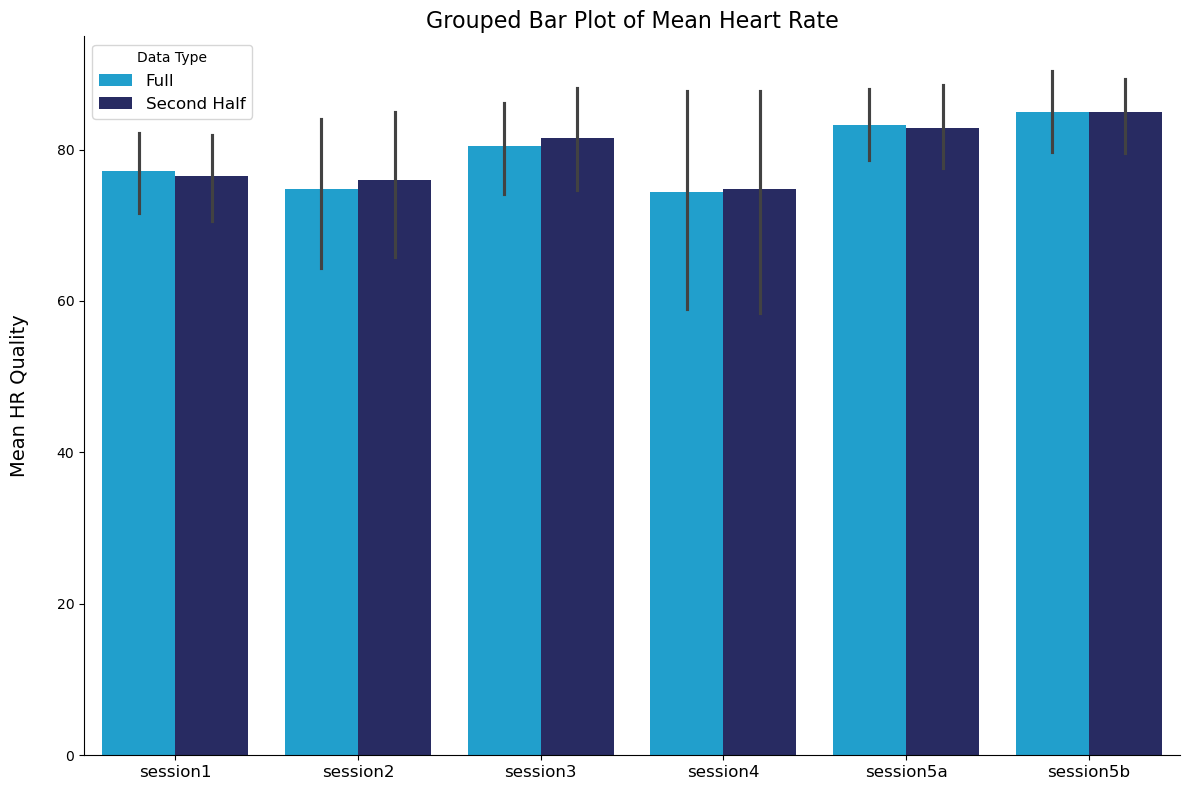

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

base_dir = '/Users/dhwanishah/Desktop/MS/VR-Dhwani/neurokit-64-hr'
fig_dir = '/Users/dhwanishah/Desktop/MS/VR-Dhwani/figures'

sessions = ['session-1.csv', 'session-2.csv', 'session-3.csv', 'session-4.csv', 'session-5a.csv', 'session-5b.csv']
session_names = ['session1', 'session2', 'session3', 'session4', 'session5a', 'session5b']
session_means_full = []
session_means_second_half = []

for session_file, session_name in zip(sessions, session_names):
    # Loop through subjects
    for sub_dir in sorted(os.listdir(base_dir)):
        sub_path = os.path.join(base_dir, sub_dir)
        if os.path.isdir(sub_path):
            session_path = os.path.join(sub_path, session_file)

            if os.path.exists(session_path):
                df_session = pd.read_csv(session_path)

                # Calculate mean for the full data
                mean_full = df_session['PPG_Rate'].mean()
                session_means_full.append([sub_dir, session_name, mean_full])

                # Calculate mean for the second half
                half_way_point = int(len(df_session) / 2)
                df_session_second_half = df_session.iloc[half_way_point:]
                mean_tonic_eda = df_session_second_half['PPG_Rate'].mean()
                session_means_second_half.append([sub_dir, session_name, mean_tonic_eda])

# Create DataFrames for full and second half means
df_full_means = pd.DataFrame(session_means_full, columns=['subject', 'session', 'mean_tonic_eda'])
df_second_half_means = pd.DataFrame(session_means_second_half, columns=['subject', 'session', 'mean_tonic_eda'])

# Add a new column to distinguish between full and second half means
df_full_means['data_type'] = 'Full'
df_second_half_means['data_type'] = 'Second Half'

# Concatenate the DataFrames
df_all_sessions = pd.concat([df_full_means, df_second_half_means], ignore_index=True)

# Now you can proceed with your plotting code

# Order subjects for plotting
subject_order = [f'sub-{i}' for i in range(1, 11)]
df_all_sessions['subject'] = pd.Categorical(df_all_sessions['subject'], categories=subject_order, ordered=True)

# Fill NaN values (if any)
df_all_sessions['mean_tonic_eda'].fillna(df_all_sessions['mean_tonic_eda'].mean(), inplace=True)

# Plotting
plt.figure(figsize=(12, 8))

sns.barplot(data=df_all_sessions, x='session', y='mean_tonic_eda', hue='data_type', palette=["#05ace8", "#1e226c"])
plt.xlabel(None)
plt.ylabel('Mean HR Quality\n', fontsize=14)
plt.title('Grouped Bar Plot of Mean Heart Rate', fontsize=16)
plt.xticks(fontsize=12)
plt.legend(title='Data Type', fontsize=12)
plt.tight_layout()
sns.despine()

# # Save figure if specified
# save_figs = 1  # Adjust as necessary
# if save_figs == 1:
#     plt.savefig(f"{fig_dir}/grouped-participant-session-means.png", dpi=300)

plt.show()


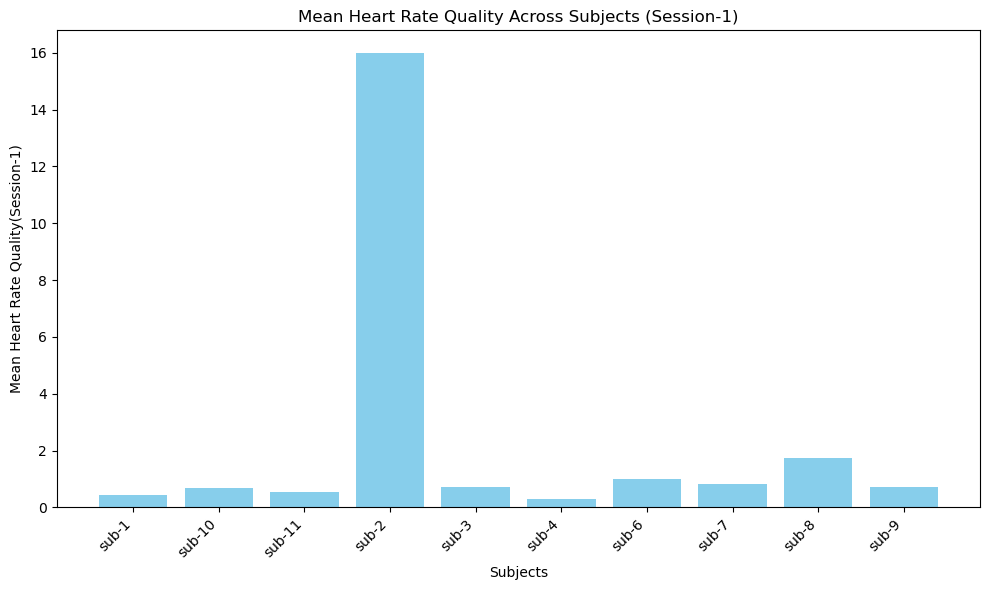

In [16]:
import warnings
warnings.filterwarnings("ignore")
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import neurokit2 as nk
import seaborn as sns


# Define the path to the directory containing subject folders
base_dir = '/Users/dhwanishah/Desktop/MS/VR-Dhwani/subject-csvs-hr'
fig_dir = '/Users/dhwanishah/Desktop/MS/VR-Dhwani/figures'

sessions = ['session-1.csv', 'session-2.csv', 'session-3.csv', 'session-4.csv', 'session-5a.csv', 'session-5b.csv']
session_names = ['session1', 'session2', 'session3', 'session4', 'session5a', 'session5b']
session_means = {}
folder_names = ['sub-1', 'sub-2', 'sub-3', 'sub-4', 'sub-5', 'sub-6', 'sub-7', 'sub-8', 'sub-9', 'sub-10', 'sub-11']


# Initialize dictionary to store session-1 mean SCR Amplitude for each subject
session_1_means = {}

# Loop through subjects
for sub_dir in sorted(folder_names):
    sub_path = os.path.join(base_dir, sub_dir)
    if os.path.isdir(sub_path):
        session_1_path = os.path.join(sub_path, sessions[1])  # Access only session-1.csv
        if (os.path.exists(session_1_path)):
            try:
                df_session_1 = pd.read_csv(session_1_path)
                mean_SCR_Amp = df_session_1['PPG_Quality'].mean()
                session_1_means[sub_dir] = mean_SCR_Amp
            except Exception as e:  # Handle potential errors
                print(f"Error processing file {session_1_path}: {e}")

# Create a pandas Series from the dictionary for plotting
subjects = list(session_1_means.keys())
mean_values = list(session_1_means.values())
df_data = pd.Series(mean_values, index=subjects)

# Create the bar graph
plt.figure(figsize=(10, 6))
plt.bar(df_data.index, df_data.values, color='skyblue')

# Set labels and title
plt.xlabel('Subjects')
plt.ylabel('Mean Heart Rate Quality(Session-1)')
plt.title('Mean Heart Rate Quality Across Subjects (Session-1)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()

# Show or save the plot
# if save_figs == 1:
#     plt.savefig(f"{fig_dir}/Mean_SCR_Amplitude_Session_1.png", dpi=300, bbox_inches='tight')
# else:
#     plt.show()


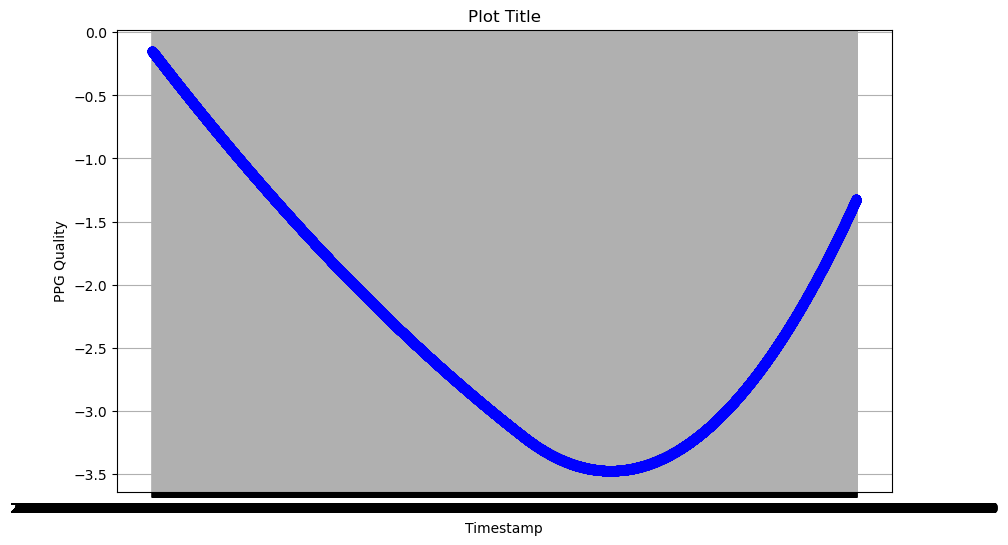

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace 'your_file.csv' with the actual path to your CSV file
file_path = '/Users/dhwanishah/Desktop/MS/VR-Dhwani/subject-csvs-hr/sub-2/session-4.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Assuming the x-axis and y-axis data are in columns named 'x_column' and 'y_column'
x_data = df['Timestamp']
y_data = df['PPG_Quality']

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x_data, y_data, marker='o', linestyle='-', color='blue')

# Set labels and title
plt.xlabel('Timestamp')
plt.ylabel('PPG Quality')
plt.title('Plot Title')

# Show the plot
plt.grid(True)
plt.show()

In [5]:
# Calculate mean tonic eda for each quartile and each subject for sessions 1-5b
import warnings
warnings.filterwarnings("ignore")
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import neurokit2 as nk
import seaborn as sns 
quartile_means = {}

sessions = ['session-1.csv', 'session-2.csv', 'session-3.csv', 'session-4.csv', 'session-5a.csv', 'session-5b.csv']
session_names = ['session1', 'session2', 'session3', 'session4', 'session5a', 'session5b']
base_dir = '/Users/dhwanishah/Desktop/MS/VR-Dhwani/subject-csvs-hr'
# Loop through sessions
for session_file, session_name in zip(sessions, session_names):
    quartile_means[session_name] = []

    # Loop through subjects
    for sub_dir in sorted(os.listdir(base_dir)):
        sub_path = os.path.join(base_dir, sub_dir)
        if os.path.isdir(sub_path):
            session_path = os.path.join(sub_path, session_file)

            if os.path.exists(session_path):
                df_session = pd.read_csv(session_path)
                # Divide the data into quarters and calculate means
                df_session['quarter'] = pd.qcut(df_session.index, 4, labels=[1, 2, 3, 4])
                means_session = df_session.groupby('quarter')['PPG_Quality'].mean().to_list()
                quartile_means[session_name].append([sub_dir] + means_session)

    columns = ['subject', 'Q1', 'Q2', 'Q3', 'Q4']
    quartile_means[session_name] = pd.DataFrame(quartile_means[session_name], columns=columns)

# Display one df
print(quartile_means['session1'])

  subject         Q1         Q2         Q3        Q4
0   sub-1   0.503757   0.547853   0.660173  0.294510
1  sub-10   0.732506   0.627580   0.680026  0.672262
2  sub-11  -0.934508   0.450451   0.404542  0.360707
3   sub-2   0.554112   0.529513   0.069364 -0.044673
4   sub-3   0.656736   0.738525   0.749098  0.429054
5   sub-4   0.536024   0.438110   0.163964  1.267265
6   sub-6   1.143568   3.056359   5.413869  3.095954
7   sub-7 -19.351287 -30.589338 -20.840278 -7.457251
8   sub-8   0.328762   1.059786   2.295071  1.936053
9   sub-9   0.628531   0.799010   0.565554  0.781372


/var/folders/0k/9bsh4pdj35g8kpn493zfhbsr0000gn/T/ipykernel_5076/4268053867.py:48: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_all_sessions['mean_hr'].fillna(df_all_sessions['mean_hr'].mean(), inplace=True)
/var/folders/0k/9bsh4pdj35g8kpn493zfhbsr0000gn/T/ipykernel_5076/4268053867.py:49: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object o

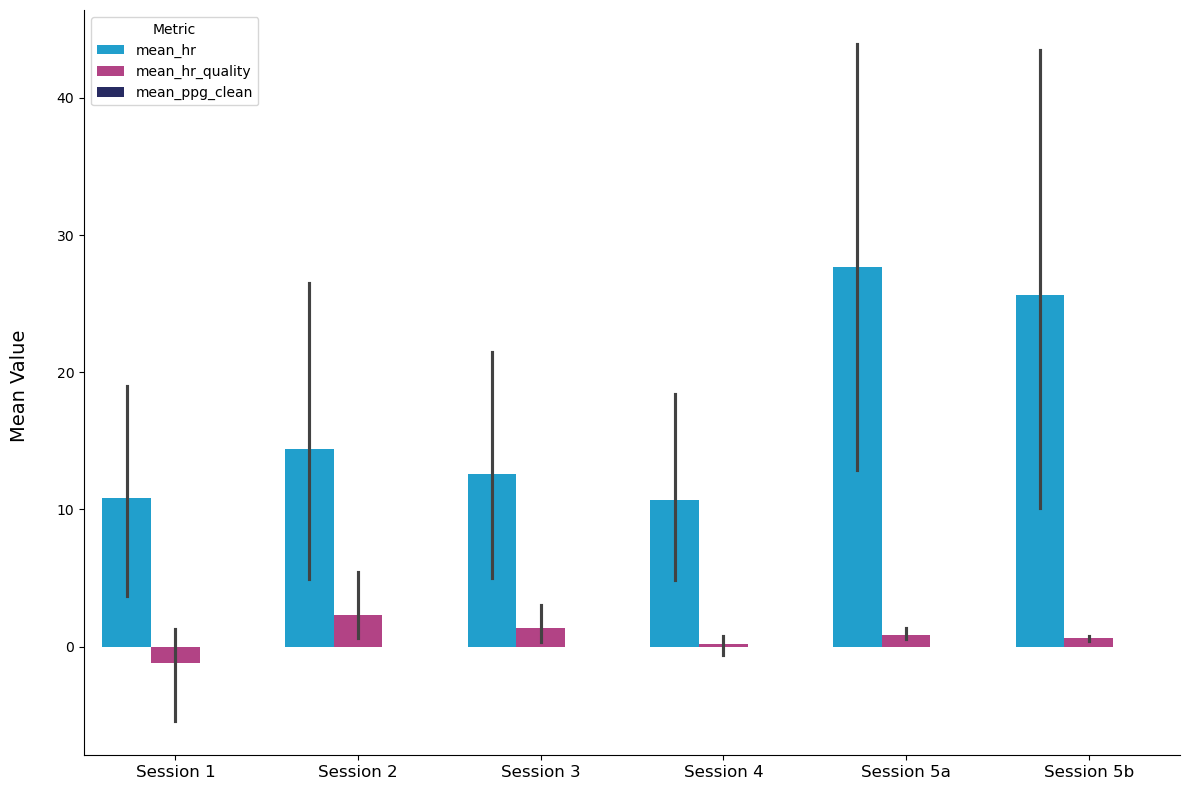

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define base directories
base_dir = '/Users/dhwanishah/Desktop/MS/VR-Dhwani/subject-csvs-hr'
fig_dir = '/Users/dhwanishah/Desktop/MS/VR-Dhwani/figures'

# Define sessions and their labels
sessions = ['session-1.csv', 'session-2.csv', 'session-3.csv', 'session-4.csv', 'session-5a.csv', 'session-5b.csv']
session_names = ['session1', 'session2', 'session3', 'session4', 'session5a', 'session5b']
session_means = {}

# Loop through each session and calculate means for HR, HR Quality, and PPG_Clean
for session_file, session_name in zip(sessions, session_names):
    session_means[session_name] = []

    for sub_dir in os.listdir(base_dir):
        sub_path = os.path.join(base_dir, sub_dir)
        if os.path.isdir(sub_path):
            session_path = os.path.join(sub_path, session_file)

            if os.path.exists(session_path):
                df_session = pd.read_csv(session_path)

                # Calculate mean heart rate, heart rate quality, and PPG_Clean
                mean_hr = df_session['PPG_Rate'].mean()
                mean_hr_quality = df_session['PPG_Quality'].mean()
                mean_ppg_clean = df_session['PPG_Clean'].mean()

                # Store all three metrics
                session_means[session_name].append([sub_dir, mean_hr, mean_hr_quality, mean_ppg_clean])

    session_means[session_name] = pd.DataFrame(session_means[session_name], columns=['subject', 'mean_hr', 'mean_hr_quality', 'mean_ppg_clean'])

# Concatenate all sessions into one DataFrame
all_sessions = []
for session_name, df in session_means.items():
    df['session'] = session_name  # Add a session column
    all_sessions.append(df)

df_all_sessions = pd.concat(all_sessions, ignore_index=True)

# Order the subjects and fill any missing values with the mean
subject_order = [f'sub-{i}' for i in range(1, 11)] 
df_all_sessions['subject'] = pd.Categorical(df_all_sessions['subject'], categories=subject_order, ordered=True)
df_all_sessions['mean_hr'].fillna(df_all_sessions['mean_hr'].mean(), inplace=True)
df_all_sessions['mean_hr_quality'].fillna(df_all_sessions['mean_hr_quality'].mean(), inplace=True)
df_all_sessions['mean_ppg_clean'].fillna(df_all_sessions['mean_ppg_clean'].mean(), inplace=True)
df_all_sessions = df_all_sessions.sort_values(by=['subject', 'session'])

# Melt the DataFrame for easier plotting (long format)
df_melted = pd.melt(df_all_sessions, id_vars=['subject', 'session'], value_vars=['mean_hr', 'mean_hr_quality', 'mean_ppg_clean'], 
                    var_name='Metric', value_name='Value')

# Plot grouped bar plot
plt.figure(figsize=(12, 8))

# Define labels for the x-axis
labels = ['Session 1', 'Session 2', 'Session 3', 'Session 4', 'Session 5a', 'Session 5b']

# Create the grouped bar plot using 'hue' for HR, HR Quality, and PPG Clean
sns.barplot(data=df_melted, x='session', y='Value', hue='Metric', palette=['#05ace8', '#c53088', '#1e226c'])
plt.xlabel(None)
plt.xticks(ticks=plt.xticks()[0], labels=labels, fontsize=12)
plt.ylabel('Mean Value \n', fontsize=14)
plt.tight_layout()
sns.despine()

# Uncomment below to save the figure
# plt.savefig(f"{fig_dir}/grouped-hr-hrquality-clean-session-means.png", dpi=300)

plt.show()
